In [ ]:
!pip install mediapy gamepy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Preparing metadata (setup.py) ... done
  Created wheel for gamepy: filename=gamepy-0.1.5-py3-none-any.whl size=4273 sha256=d87d05d4fe64fbe1776f1cf06bba0bed65ec7ecf029bee3df8de9cb0b042ecf0
  Stored in directory: /root/.cache/pip/wheels/27/58/8d/bf946d3d1e5e4d37a47b862e607be93f1343e1a750f436e9c0
Successfully built gamepy


### Basic [Gym](https://www.gymlibrary.dev/) usage

In [ ]:
import gym
from gym import envs
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mediapy as media
from moviepy.video.io.bindings import mplfig_to_npimage
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
np.set_printoptions(precision=2)
print ("gym:[%s]"%(gym.__version__))
print ("numpy:[%s]"%(np.__version__))
print ("matplotlib:[%s]"%(matplotlib.__version__))

gym:[0.25.2]
numpy:[1.23.5]
matplotlib:[3.7.1]


/usr/local/lib/python3.10/dist-packages/matplotlib_inline/config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


### FrozenLake8x8 environment

In [ ]:
env = gym.make('FrozenLake8x8-v1',render_mode='rgb_array')
print ("[%s] initialized."%(env.unwrapped.spec.id))

[FrozenLake8x8-v1] initialized.


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
def plot_env(env,figsize=(4,4),title_str=None,title_fs=10,
             PLOT_IMG=True,RETURN_IMG=False):
    img = env.render()
    if len(np.shape(img)) == 4:
        img = img[0]
    fig = plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.axis('off')
    if title_str is not None:
        plt.title(title_str,fontsize=title_fs)
    if PLOT_IMG:
        plt.show()
    # (Optional) Get image
    if RETURN_IMG:
        img = mplfig_to_npimage(fig)
        plt.close()
        return img

print ("Ready.")

Ready.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


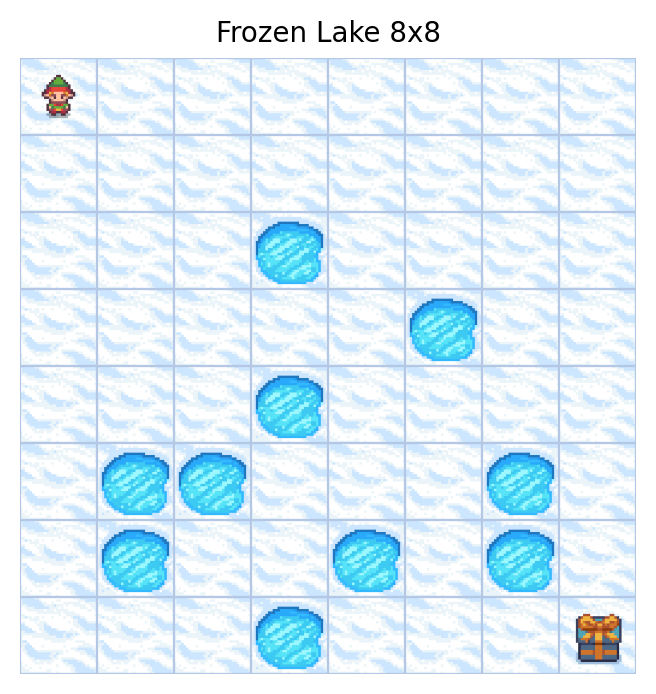

In [ ]:
env.reset()
plot_env(env,figsize=(4,4),title_str='Frozen Lake 8x8',title_fs=10)

Check state and action spaces

In [ ]:
obs_space    = env.observation_space
n_state      = obs_space.n
action_space = env.action_space
n_action     = action_space.n
print("State space:[%d]"%(n_state))
print("Action space:[%d]"%(n_action))

State space:[64]
Action space:[4]


Loop with random actions

In [ ]:
env.reset()
n_step = 100
frames = []
for tick in range(n_step):
    action = env.action_space.sample()
    observation, reward, done, truncated = env.step(action) # step
    title_str = "tick:[%d/%d] action:[%s] reward:[%.2f] done:[%d]"%(
        tick,n_step,action,reward,done
    )
    img = plot_env(env,figsize=(4,4),title_str=title_str,title_fs=8,
                   PLOT_IMG=False,RETURN_IMG=True)
    frames.append(img)
    if done: break
env.close()
print ("Done (tick:[%d])."%(tick))

Done (tick:[15]).


Animate

In [ ]:
media.show_video(frames, fps=5)

Check transition probability and reward

In [ ]:
P = env.unwrapped.P
for s in P.keys(): # for all states
    for a in P[s].keys(): # for all actions
        for (prob,s_prime,rwd,_) in P[s][a]:
            print ("P(s':%02d|s:%02d,a:%02d)=%.2f, Reward=%.2f"%
                   (s_prime,s,a,prob,rwd))

P(s':00|s:00,a:00)=0.33, Reward=0.00
P(s':00|s:00,a:00)=0.33, Reward=0.00
P(s':08|s:00,a:00)=0.33, Reward=0.00
P(s':00|s:00,a:01)=0.33, Reward=0.00
P(s':08|s:00,a:01)=0.33, Reward=0.00
P(s':01|s:00,a:01)=0.33, Reward=0.00
P(s':08|s:00,a:02)=0.33, Reward=0.00
P(s':01|s:00,a:02)=0.33, Reward=0.00
P(s':00|s:00,a:02)=0.33, Reward=0.00
P(s':01|s:00,a:03)=0.33, Reward=0.00
P(s':00|s:00,a:03)=0.33, Reward=0.00
P(s':00|s:00,a:03)=0.33, Reward=0.00
P(s':01|s:01,a:00)=0.33, Reward=0.00
P(s':00|s:01,a:00)=0.33, Reward=0.00
P(s':09|s:01,a:00)=0.33, Reward=0.00
P(s':00|s:01,a:01)=0.33, Reward=0.00
P(s':09|s:01,a:01)=0.33, Reward=0.00
P(s':02|s:01,a:01)=0.33, Reward=0.00
P(s':09|s:01,a:02)=0.33, Reward=0.00
P(s':02|s:01,a:02)=0.33, Reward=0.00
P(s':01|s:01,a:02)=0.33, Reward=0.00
P(s':02|s:01,a:03)=0.33, Reward=0.00
P(s':01|s:01,a:03)=0.33, Reward=0.00
P(s':00|s:01,a:03)=0.33, Reward=0.00
P(s':02|s:02,a:00)=0.33, Reward=0.00
P(s':01|s:02,a:00)=0.33, Reward=0.00
P(s':10|s:02,a:00)=0.33, Reward=0.00
P

###CartPole environment

In [ ]:
env = gym.make('CartPole-v1',render_mode='rgb_array')
print ("[%s] initialized."%(env.unwrapped.spec.id))

[CartPole-v1] initialized.


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


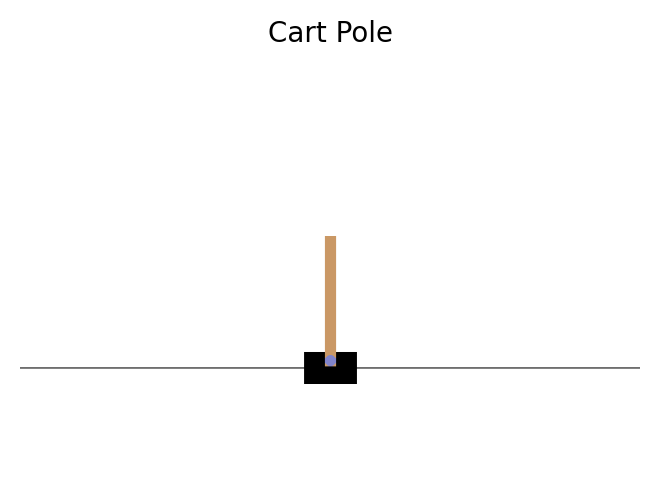

In [ ]:
env.reset()
plot_env(env,figsize=(4,3),title_str='Cart Pole',title_fs=10)

Check state and action spaces

In [ ]:
obs_space    = env.observation_space
n_state      = obs_space.n
action_space = env.action_space
n_action     = action_space.n
print("State space:[%d]"%(n_state))
print("Action space:[%d]"%(n_action))

State space:[4]
Action space:[2]


In [ ]:
obs_space    = env.observation_space
obs_low      = obs_space.low
obs_high     = obs_space.high
action_space = env.action_space
n_action     = action_space.n
print("State space:[%s~%s]"%(obs_low,obs_high))
print("Action space:[%d]"%(n_action))

State space:[[-4.80e+00 -3.40e+38 -4.19e-01 -3.40e+38]~[4.80e+00 3.40e+38 4.19e-01 3.40e+38]]
Action space:[2]


Loop with random actions

In [ ]:
env.reset()
n_step = 100
frames = []
for tick in range(n_step):
    action = env.action_space.sample()
    observation, reward, done, truncated = env.step(action) # step
    title_str = "tick:[%d/%d] action:[%s] reward:[%.2f] done:[%d]"%(
        tick,n_step,action,reward,done
    )
    img = plot_env(env,figsize=(4,3),title_str=title_str,title_fs=8,
                   PLOT_IMG=False,RETURN_IMG=True)
    frames.append(img)
    if done: break
env.close()
print ("Done (tick:[%d])."%(tick))

Done (tick:[39]).


Animate

In [ ]:
media.show_video(frames, fps=5)